## Creating Geometric Objects

### Points
A point is the simplest geometric object in DotGeometry, defined by its x and y coordinates.

In [59]:
using DotGeometry

p1 = Point(1.0, 2.0)
p2 = Point(3.0, 4.0)

2-element Point{Float64} with indices SOneTo(2):
 3.0
 4.0

### Circles
A circle is defined by its center point and radius.

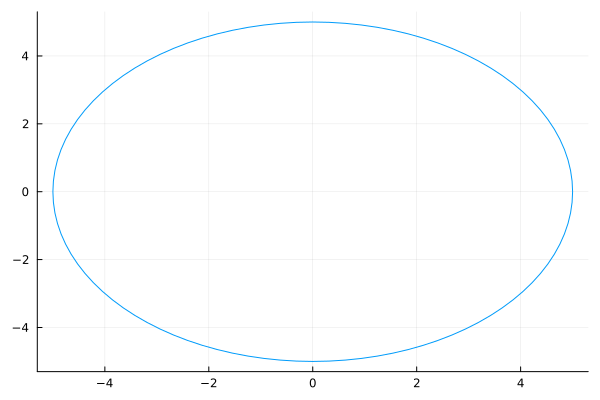

In [60]:
center = Point(0.0, 0.0);
radius = 5.0;
circle = Circle(center, radius)

plot(circle, legend=nothing)

### Line Segments
A line segment is defined by two points.

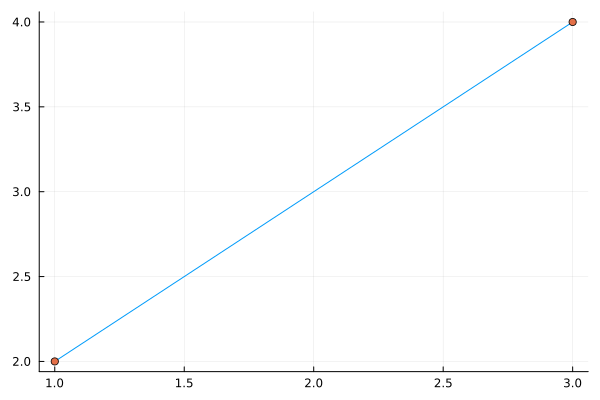

In [61]:
segment = Segment(p1, p2)

plot(segment, legend=nothing)
scatter!([p1, p2], legend=nothing)

### Bézier Curves
Bézier curves are parametric curves defined by control points.

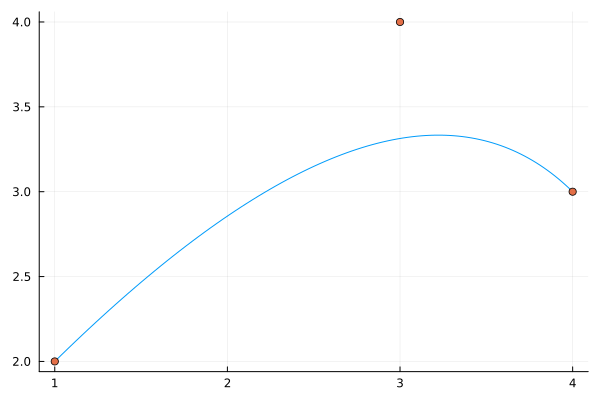

In [62]:
p3 = Point(4.0, 3.0)
bezier = BezierCurve(p1, p2, p3)
plot(bezier, legend=nothing)
scatter!([p1, p2, p3])

### Circular Arc

Define a circular arc based on start point, end point and radius of underlying circle.

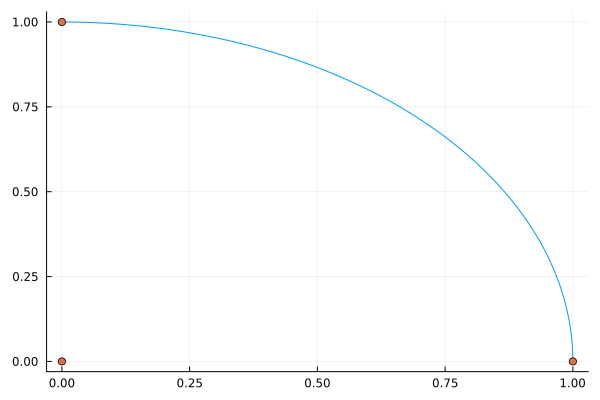

In [63]:
circulararc = CircularArc(Point(1.0, 0.0), Point(0.0, 1.0), origin)
plot(circulararc, legend=nothing)
scatter!([origin, Point(1.0, 0.0), Point(0.0, 1.0)])

## Domain example

We define and visualize a composite domain by defining its constituents.

We first define the points used to construct each geometry:

In [64]:
# Define points used to define each geometry
ps = Point.([origin, (6.0, 0.0), (7.5, 2.5), (5.0, 5.0), (4.0, 6.0), (2.5, 5.25), (0.0, 2.75)])

7-element Vector{Point{Float64}}:
 [0.0, 0.0]
 [6.0, 0.0]
 [7.5, 2.5]
 [5.0, 5.0]
 [4.0, 6.0]
 [2.5, 5.25]
 [0.0, 2.75]

Next, define the boundary based on its individual geometric constituents.

In [65]:
# Define boundary based on individual entity
Ω = CompositeDomain(
        [Segment(ps[1], ps[2]),
        CircularArc(ps[2], ps[3], Point(4.0, 3.0)),
        Segment(ps[3], ps[4]),
        BezierCurve(ps[4:6]),
        Segment(ps[6], ps[7]),
        Segment(ps[7], ps[1])]
        );

# Discretize the boundary based on number of points in each curve
Ω_disc = discretize_boundary(Ω, [30,20,10,20,12,30]);

# Can also be discretized with the same number of points for all curves
# Ω_disc = discretize_boundary(Ω, 20);

122-element Vector{Point}:
 [0.0, 0.0]
 [0.20689655172413793, 0.0]
 [0.41379310344827586, 0.0]
 [0.6206896551724138, 0.0]
 [0.8275862068965517, 0.0]
 [1.0344827586206897, 0.0]
 [1.2413793103448276, 0.0]
 [1.4482758620689655, 0.0]
 [1.6551724137931034, 0.0]
 [1.8620689655172415, 0.0]
 ⋮
 [0.0, 0.7586206896551724]
 [0.0, 0.6637931034482758]
 [0.0, 0.568965517241379]
 [0.0, 0.47413793103448265]
 [0.0, 0.3793103448275863]
 [0.0, 0.2844827586206895]
 [0.0, 0.18965517241379315]
 [0.0, 0.09482758620689635]
 [0.0, 0.0]

We next visualize the exact and discretized boundaries

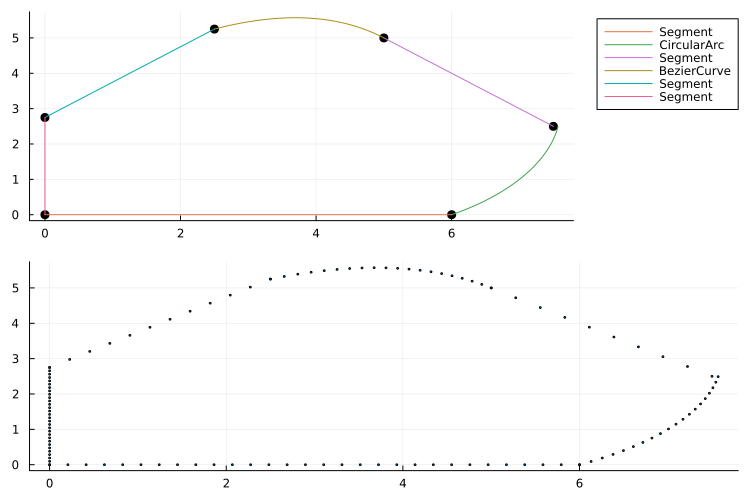

In [66]:
# [tmp] remove intermediate bezier control point (which isn't on the boundary) from plot
ps_plot = setdiff(ps, [ps[5]])

# Plot the exact boundary
plt = plot(legend=:outertopright, lw=2, size=(750,500))
scatter!(plt, ps_plot, markersize=5, color=:black, label="")
for (i, c) in enumerate(Ω.entities)
    curve_name = get_typename(c)
    plot!(plt, c, label=curve_name)
end

# Plot the discretized boundary
plt2 = plot()
scatter!(plt2, Ω_disc, label="", markersize=1)

pltF = plot(plt, plt2, layout=(2,1))
display(pltF)

### Triangulating the domain

Rather than discretizing the boundary only, we can discretize the domain into elements (e.g. using triangulation) as follows.

We first define the points on the boundary we consider.

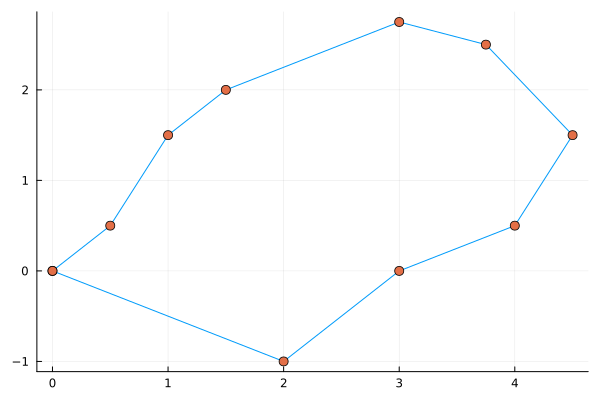

In [67]:
using DelaunayTriangulation
using Random
Random.seed!(1234)

# Mock boundary points
boundary_points = [
    (0.0,0.0), (2.0, -1.0), (3.0, 0.0),
    (4.0, 0.5), (4.5, 1.5),
    (3.75, 2.5), (3.0, 2.75), (1.5, 2.0),
    (1.0, 1.5), (0.5, 0.5), (0.0,0.0),
    ]

plot(boundary_points, legend=nothing)
scatter!(boundary_points, markersize=5)

Now, we define the points we want to triangulate. This example is purely illustrative, so we sample some points uniformly just for visualization purposes.

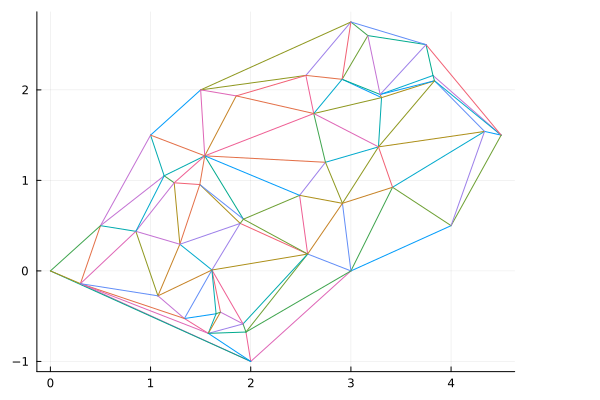

In [68]:
Random.seed!(12345)

sampled_pts = [(5*rand(), 4*rand()-1) for _ in 1:75]

boundary_nodes, sampled_pts = convert_boundary_points_to_indices(boundary_points; existing_points = sampled_pts);
new_points = triangulate(sampled_pts; boundary_nodes)

plt2 = plot(legend=:outertopright)

# tmp workaround for indexing; to be done internally and more cleverly (ignore this loop)
for pt in new_points.graph.edges
    if pt[1] > 0
        p1 = sampled_pts[pt[1]]
        p2 = sampled_pts[pt[2]]

        plot!(plt2, [p1[1], p2[1]], [p1[2], p2[2]], label="")
    end
end

display(plt2)